<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#My-NLP-library-toolkits:-Part-1" data-toc-modified-id="My-NLP-library-toolkits:-Part-1-1">My NLP library toolkits: Part 1</a></span><ul class="toc-item"><li><span><a href="#0.-Loading-the-dataset" data-toc-modified-id="0.-Loading-the-dataset-1.1">0. Loading the dataset</a></span></li><li><span><a href="#1.-N-grams" data-toc-modified-id="1.-N-grams-1.2">1. N-grams</a></span></li><li><span><a href="#2.-Part-of_speech-tagging" data-toc-modified-id="2.-Part-of_speech-tagging-1.3">2. Part-of_speech tagging</a></span></li><li><span><a href="#3.-Lemmatizer" data-toc-modified-id="3.-Lemmatizer-1.4">3. Lemmatizer</a></span></li><li><span><a href="#4.-Word-frequencies-+-data-cleaning" data-toc-modified-id="4.-Word-frequencies-+-data-cleaning-1.5">4. Word frequencies + data cleaning</a></span><ul class="toc-item"><li><span><a href="#4.1-Bar-chart" data-toc-modified-id="4.1-Bar-chart-1.5.1">4.1 Bar chart</a></span></li><li><span><a href="#4.2-Treemap" data-toc-modified-id="4.2-Treemap-1.5.2">4.2 Treemap</a></span></li><li><span><a href="#4.3-Word-cloud" data-toc-modified-id="4.3-Word-cloud-1.5.3">4.3 Word cloud</a></span></li></ul></li><li><span><a href="#5.-TF-IDF" data-toc-modified-id="5.-TF-IDF-1.6">5. TF-IDF</a></span></li><li><span><a href="#6.-Sentimental-Analysis" data-toc-modified-id="6.-Sentimental-Analysis-1.7">6. Sentimental Analysis</a></span><ul class="toc-item"><li><span><a href="#6.1-Unified" data-toc-modified-id="6.1-Unified-1.7.1">6.1 Unified</a></span></li><li><span><a href="#6.2-Combined" data-toc-modified-id="6.2-Combined-1.7.2">6.2 Combined</a></span></li><li><span><a href="#6.3-Sentiment-labels" data-toc-modified-id="6.3-Sentiment-labels-1.7.3">6.3 Sentiment labels</a></span></li></ul></li></ul></li></ul></div>

# My NLP library toolkits: Part 1

**Tao Lin**

This part mainly contains word and subword level analyses like frequency counts and POS.

1. N-grams
2. POS tagging
3. Lemmatizer
4. Word frequency + data cleaning
5. TF-IDF vectors
6. Sentiment analysis

----------------

## 0. Loading the dataset

In [1]:
# open the file and read the CNN-dm data (originally for summarization tasks)
source_lines = open('/Users/taolin/Desktop/udacity/data/train.txt.src' , encoding='utf-8').\
read().strip().split('\n')
source_lines = source_lines
target_lines = open('/Users/taolin/Desktop/udacity/data/train.txt.tgt.tagged' , encoding='utf-8').\
read().replace("</t>",'').replace("<t>",'').strip('').split('\n')
target_lines = target_lines

In [2]:
sample_data = target_lines[0:1000]
print("The raw input: \n\n" + sample_data[45])

The raw input: 

 orme , tennessee , has running water from 6 p.m. to 9 p.m.   town 's spring ran dry in midst of southeast drought .   donated water is trucked in from alabama .   completion of pipeline will solve problem for good . 


## 1. N-grams

In [3]:
import nltk
from nltk.util import ngrams

In [4]:
def Ngrams(sen,num,string):
    n_grams = ngrams(sen.split(), num)
    x = [grams for grams in n_grams]
    print(f"A {string} list:\n")
    print (*x)

# example: bigrams
Ngrams(sample_data[45],2,"bigram")

A bigram list:

('orme', ',') (',', 'tennessee') ('tennessee', ',') (',', 'has') ('has', 'running') ('running', 'water') ('water', 'from') ('from', '6') ('6', 'p.m.') ('p.m.', 'to') ('to', '9') ('9', 'p.m.') ('p.m.', 'town') ('town', "'s") ("'s", 'spring') ('spring', 'ran') ('ran', 'dry') ('dry', 'in') ('in', 'midst') ('midst', 'of') ('of', 'southeast') ('southeast', 'drought') ('drought', '.') ('.', 'donated') ('donated', 'water') ('water', 'is') ('is', 'trucked') ('trucked', 'in') ('in', 'from') ('from', 'alabama') ('alabama', '.') ('.', 'completion') ('completion', 'of') ('of', 'pipeline') ('pipeline', 'will') ('will', 'solve') ('solve', 'problem') ('problem', 'for') ('for', 'good') ('good', '.')


## 2. Part-of_speech tagging

In [5]:
from nltk.tokenize import word_tokenize

def POS_tagger(sen):
    text = word_tokenize(sen)
    print("POS tagging output: \n")
    print(*nltk.pos_tag(text))
POS_tagger(sample_data[45])

POS tagging output: 

('orme', 'NN') (',', ',') ('tennessee', 'NN') (',', ',') ('has', 'VBZ') ('running', 'VBG') ('water', 'NN') ('from', 'IN') ('6', 'CD') ('p.m.', 'NN') ('to', 'TO') ('9', 'CD') ('p.m.', 'NN') ('town', 'NN') ("'s", 'POS') ('spring', 'NN') ('ran', 'VBD') ('dry', 'NNS') ('in', 'IN') ('midst', 'NN') ('of', 'IN') ('southeast', 'JJ') ('drought', 'NN') ('.', '.') ('donated', 'JJ') ('water', 'NN') ('is', 'VBZ') ('trucked', 'VBN') ('in', 'IN') ('from', 'IN') ('alabama', 'NN') ('.', '.') ('completion', 'NN') ('of', 'IN') ('pipeline', 'NN') ('will', 'MD') ('solve', 'VB') ('problem', 'NN') ('for', 'IN') ('good', 'JJ') ('.', '.')


## 3. Lemmatizer

In [6]:
import spacy

nlp = spacy.load('en')
nlp.remove_pipe('parser')
nlp.remove_pipe('ner')


def Lemmatizer(sen):
    doc = nlp(sen)
    lem = [token.lemma_ for token in doc]
    print("Lemmatized result: \n")
    print(lem)
Lemmatizer(sample_data[45])      

Lemmatized result: 

[' ', 'orme', ',', 'tennessee', ',', 'have', 'run', 'water', 'from', '6', 'p.m.', 'to', '9', 'p.m.', '  ', 'town', "'s", 'spring', 'run', 'dry', 'in', 'midst', 'of', 'southeast', 'drought', '.', '  ', 'donate', 'water', 'be', 'truck', 'in', 'from', 'alabama', '.', '  ', 'completion', 'of', 'pipeline', 'will', 'solve', 'problem', 'for', 'good', '.']


## 4. Word frequencies + data cleaning

In [7]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','please','fw','fwd','user','issue'])
stop_words.extend(["a","about","above","after","again","against","ain","all","am","an","and","any","are","aren","aren't","as","at","be","because","been","before","being","below","between","both","but","by","can","couldn","couldn't","d","did","didn","didn't","do","does","doesn","doesn't","doing","don","don't","down","during","each","few","for","from","further","had","hadn","hadn't","has","hasn","hasn't","have","haven","haven't","having","he","her","here","hers","herself","him","himself","his","how","i","if","in","into","is","isn","isn't","it","it's","its","itself","just","ll","m","ma","me","mightn","mightn't","more","most","mustn","mustn't","my","myself","needn","needn't","no","nor","not","now","o","of","off","on","once","only","or","other","our","ours","ourselves","out","over","own","re","s","same","shan","shan't","she","she's","should","should've","shouldn","shouldn't","so","some","such","t","than","that","that'll","the","their","theirs","them","themselves","then","there","these","they","this","those","through","to","too","under","until","up","ve","very","was","wasn","wasn't","we","were","weren","weren't","what","when","where","which","while","who","whom","why","will","with","won","won't","wouldn","wouldn't","y","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","could","he'd","he'll","he's","here's","how's","i'd","i'll","i'm","i've","let's","ought","she'd","she'll","that's","there's","they'd","they'll","they're","they've","we'd","we'll","we're","we've","what's","when's","where's","who's","why's","would","able","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","afterwards","ah","almost","alone","along","already","also","although","always","among","amongst","announce","another","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","arent","arise","around","aside","ask","asking","auth","available","away","awfully","b","back","became","become","becomes","becoming","beforehand","begin","beginning","beginnings","begins","behind","believe","beside","besides","beyond","biol","brief","briefly","c","ca","came","cannot","can't","cause","causes","certain","certainly","co","com","come","comes","contain","containing","contains","couldnt","date","different","done","downwards","due","e","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","except","f","far","ff","fifth","first","five","fix","followed","following","follows","former","formerly","forth","found","four","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","happens","hardly","hed","hence","hereafter","hereby","herein","heres","hereupon","hes","hi","hid","hither","home","howbeit","however","hundred","id","ie","im","immediate","immediately","importance","important","inc","indeed","index","information","instead","invention","inward","itd","it'll","j","k","keep","keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","'ll","look","looking","looks","ltd","made","mainly","make","makes","many","may","maybe","mean","means","meantime","meanwhile","merely","mg","might","million","miss","ml","moreover","mostly","mr","mrs","much","mug","must","n","na","name","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next","nine","ninety","nobody","non","none","nonetheless","noone","normally","nos","noted","nothing","nowhere","obtain","obtained","obviously","often","oh","ok","okay","old","omitted","one","ones","onto","ord","others","otherwise","outside","overall","owing","p","page","pages","part","particular","particularly","past","per","perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","ran","rather","rd","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","respectively","resulted","resulting","results","right","run","said","saw","say","saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent","seven","several","shall","shed","shes","show","showed","shown","showns","shows","significant","significantly","similar","similarly","since","six","slightly","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop","strongly","sub","substantially","successfully","sufficiently","suggest","sup","sure","take","taken","taking","tell","tends","th","thank","thanks","thanx","thats","that've","thence","thereafter","thereby","thered","therefore","therein","there'll","thereof","therere","theres","thereto","thereupon","there've","theyd","theyre","think","thou","though","thoughh","thousand","throug","throughout","thru","thus","til","tip","together","took","toward","towards","tried","tries","truly","try","trying","ts","twice","two","u","un","unfortunately","unless","unlike","unlikely","unto","upon","ups","us","use","used","useful","usefully","usefulness","uses","using","usually","v","value","various","'ve","via","viz","vol","vols","vs","w","want","wants","wasnt","way","wed","welcome","went","werent","whatever","what'll","whats","whence","whenever","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","whim","whither","whod","whoever","whole","who'll","whomever","whos","whose","widely","willing","wish","within","without","wont","words","world","wouldnt","www","x","yes","yet","youd","youre","z","zero","a's","ain't","allow","allows","apart","appear","appreciate","appropriate","associated","best","better","c'mon","c's","cant","changes","clearly","concerning","consequently","consider","considering","corresponding","course","currently","definitely","described","despite","entirely","exactly","example","going","greetings","hello","help","hopefully","ignored","inasmuch","indicate","indicated","indicates","inner","insofar","it'd","keep","keeps","novel","presumably","reasonably","second","secondly","sensible","serious","seriously","sure","t's","third","thorough","thoroughly","three","well","wonder","a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst", "amoungst", "amount", "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as", "at", "back","be","became", "because","become","becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the","a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p",
"q", "r", "s", "t", "u", "v", "w", "x", "y", "z","A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z",'co','op','research-articl', 'pagecount','cit','ibid','les','le','au','que','est','pas','vol','el','los','pp','u201d','well-b', 'http', 'volumtype', 'par', '0o', '0s', '3a', '3b', '3d', '6b', '6o', 'a1', 'a2', 'a3', 'a4', 'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'aj', 'al', 'an', 'ao', 'ap', 'ar', 'av', 'aw', 'ax', 'ay', 'az', 'b1', 'b2', 'b3', 'ba', 'bc', 'bd', 'be', 'bi', 'bj', 'bk', 'bl', 'bn', 'bp', 'br', 'bs', 'bt', 'bu', 'bx', 'c1', 'c2', 'c3', 'cc', 'cd', 'ce', 'cf', 'cg', 'ch', 'ci', 'cj', 'cl', 'cm', 'cn', 'cp', 'cq', 'cr', 'cs', 'ct', 'cu', 'cv', 'cx', 'cy', 'cz', 'd2', 'da', 'dc', 'dd', 'de', 'df', 'di', 'dj', 'dk', 'dl', 'do', 'dp', 'dr', 'ds', 'dt', 'du', 'dx', 'dy', 'e2', 'e3', 'ea', 'ec', 'ed', 'ee', 'ef', 'ei', 'ej', 'el', 'em', 'en', 'eo', 'ep', 'eq', 'er', 'es', 'et', 'eu', 'ev', 'ex', 'ey', 'f2', 'fa', 'fc', 'ff', 'fi', 'fj', 'fl', 'fn', 'fo', 'fr', 'fs', 'ft', 'fu', 'fy', 'ga', 'ge', 'gi', 'gj', 'gl', 'go', 'gr', 'gs', 'gy', 'h2', 'h3', 'hh', 'hi', 'hj', 'ho', 'hr', 'hs', 'hu', 'hy', 'i', 'i2', 'i3', 'i4', 'i6', 'i7', 'i8', 'ia', 'ib', 'ic', 'ie', 'ig', 'ih', 'ii', 'ij', 'il', 'in', 'io', 'ip', 'iq', 'ir', 'iv', 'ix', 'iy', 'iz', 'jj', 'jr', 'js', 'jt', 'ju', 'ke', 'kg', 'kj', 'km', 'ko', 'l2', 'la', 'lb', 'lc', 'lf', 'lj', 'ln', 'lo', 'lr', 'ls', 'lt', 'm2', 'ml', 'mn', 'mo', 'ms', 'mt', 'mu', 'n2', 'nc', 'nd', 'ne', 'ng', 'ni', 'nj', 'nl', 'nn', 'nr', 'ns', 'nt', 'ny', 'oa', 'ob', 'oc', 'od', 'of', 'og', 'oi', 'oj', 'ol', 'om', 'on', 'oo', 'oq', 'or', 'os', 'ot', 'ou', 'ow', 'ox', 'oz', 'p1', 'p2', 'p3', 'pc', 'pd', 'pe', 'pf', 'ph', 'pi', 'pj', 'pk', 'pl', 'pm', 'pn', 'po', 'pq', 'pr', 'ps', 'pt', 'pu', 'py', 'qj', 'qu', 'r2', 'ra', 'rc', 'rd', 'rf', 'rh', 'ri', 'rj', 'rl', 'rm', 'rn', 'ro', 'rq', 'rr', 'rs', 'rt', 'ru', 'rv', 'ry', 's2', 'sa', 'sc', 'sd', 'se', 'sf', 'si', 'sj', 'sl', 'sm', 'sn', 'sp', 'sq', 'sr', 'ss', 'st', 'sy', 'sz', 't1', 't2', 't3', 'tb', 'tc', 'td', 'te', 'tf', 'th', 'ti', 'tj', 'tl', 'tm', 'tn', 'tp', 'tq', 'tr', 'ts', 'tt', 'tv', 'tx', 'ue', 'ui', 'uj', 'uk', 'um', 'un', 'uo', 'ur', 'ut', 'va', 'wa', 'vd', 'wi', 'vj', 'vo', 'wo', 'vq', 'vt', 'vu', 'x1', 'x2', 'x3', 'xf', 'xi', 'xj', 'xk', 'xl', 'xn', 'xo', 'xs', 'xt', 'xv', 'xx', 'y2', 'yj', 'yl', 'yr', 'ys', 'yt', 'zi', 'zz'])

In [8]:
import re

# data cleaning
def data_list(data,stop):
    
    #from nltk.stem.lancaster import LancasterStemmer
    #st = LancasterStemmer()
    
    new_data = []
    for item in data:
        
        #if type(item)== str: doc = nlp(item)
        # document level language detection. Think of it like average language of document!
        #lang = doc._.language['language']
        #print(lang)
        
        #if (type(item) == str) and (lang =="en"):
        if (type(item) == str):
            #print(item)
            #print("\n")
    
    # delete some expressions
            if "== Created by": pass
    
    # delete weblinks
            item = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',"",item)
    #lower case
            item = item.lower()
    
    # remove newlines
            item = re.sub(r'\r\n\r\n\r\n\r\n', '. ', item)

    # remove emails
            item = re.sub('\S*@\S*\s?', '', item)
        
    # remove <...> and {...}
            item = re.sub('<.*?>','',item)
            item = re.sub('{.*?}','',item)

    # remove all numbers; puntuations
            item = re.sub(r'\d+', '',item)
            item = re.sub(r'\+', '',item)
            item = re.sub(r'\|',"",item)
            #item = re.sub(r'==','',item)
            #item = re.sub(r'\*','',item)
            #item = re.sub(r'\_','',item)
            item = re.sub(r'[^\w\s]', '', item)
    
    # remove specific words or phrases
            item = re.sub('hi team',"",item)
            item = re.sub("hey","",item)
            item = re.sub("hi","",item)
            item = re.sub("hi there","",item)
            
            #print(item)
            
            w_list = item.split()
            #print(w_list)
            w = []  
            for word in w_list:
                if word not in stop:
                    w.append(word)
            new_data.append(w)
        
    return(new_data)

In [9]:
# define a word frequency count function
import itertools
from collections import Counter

def frequency_counts(list_name,st,num):
    x = data_list(list_name,stop_words)
    #print(x)
    merged = list(itertools.chain(*x))# merge the list
    #print(merged)
    counts = Counter(merged) # count freq
    y = list(counts.items())
    MY_SORTED_TUPLE = list(sorted(y, key=lambda item: item[1],reverse=True)) # demonstrate the results in a tuple
    #print(MY_SORTED_TUPLE)
    print(f"The top {num} words for {st}: \n\n")
    return MY_SORTED_TUPLE[0:num] # top-n words

freq = frequency_counts(sample_data,"the sample corpus",10)
print(*freq)

The top 10 words for the sample corpus: 


('police', 112) ('president', 105) ('people', 98) ('obama', 91) ('iraq', 75) ('killed', 66) ('clinton', 62) ('bush', 58) ('years', 56) ('year', 55)


### 4.1 Bar chart

In [10]:
# create a bar chart
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.pyplot import figure
from textwrap import wrap

def bar(count_tuple,title):
    x = [item[0] for item in count_tuple[0:9]]
    y = [item[1] for item in count_tuple[0:9]]
    
    x = [re.sub("(.{10})", "\\1\n", label, 0, re.DOTALL) for label in x]

    #y = ['\n'.join(wrap(1,12)) for item in y]
    
    plt.figure(figsize=(10,10))
    matplotlib.rcParams.update({'font.size': 10})
    
    plt.bar(x,y)

    plt.title(title)
    plt.xlabel('Words')
    
    plt.ylabel('Counts')
    plt.show()
    plt.close()
    
bar(freq,'Top-10 single-word topics')

<Figure size 1000x1000 with 1 Axes>

### 4.2 Treemap

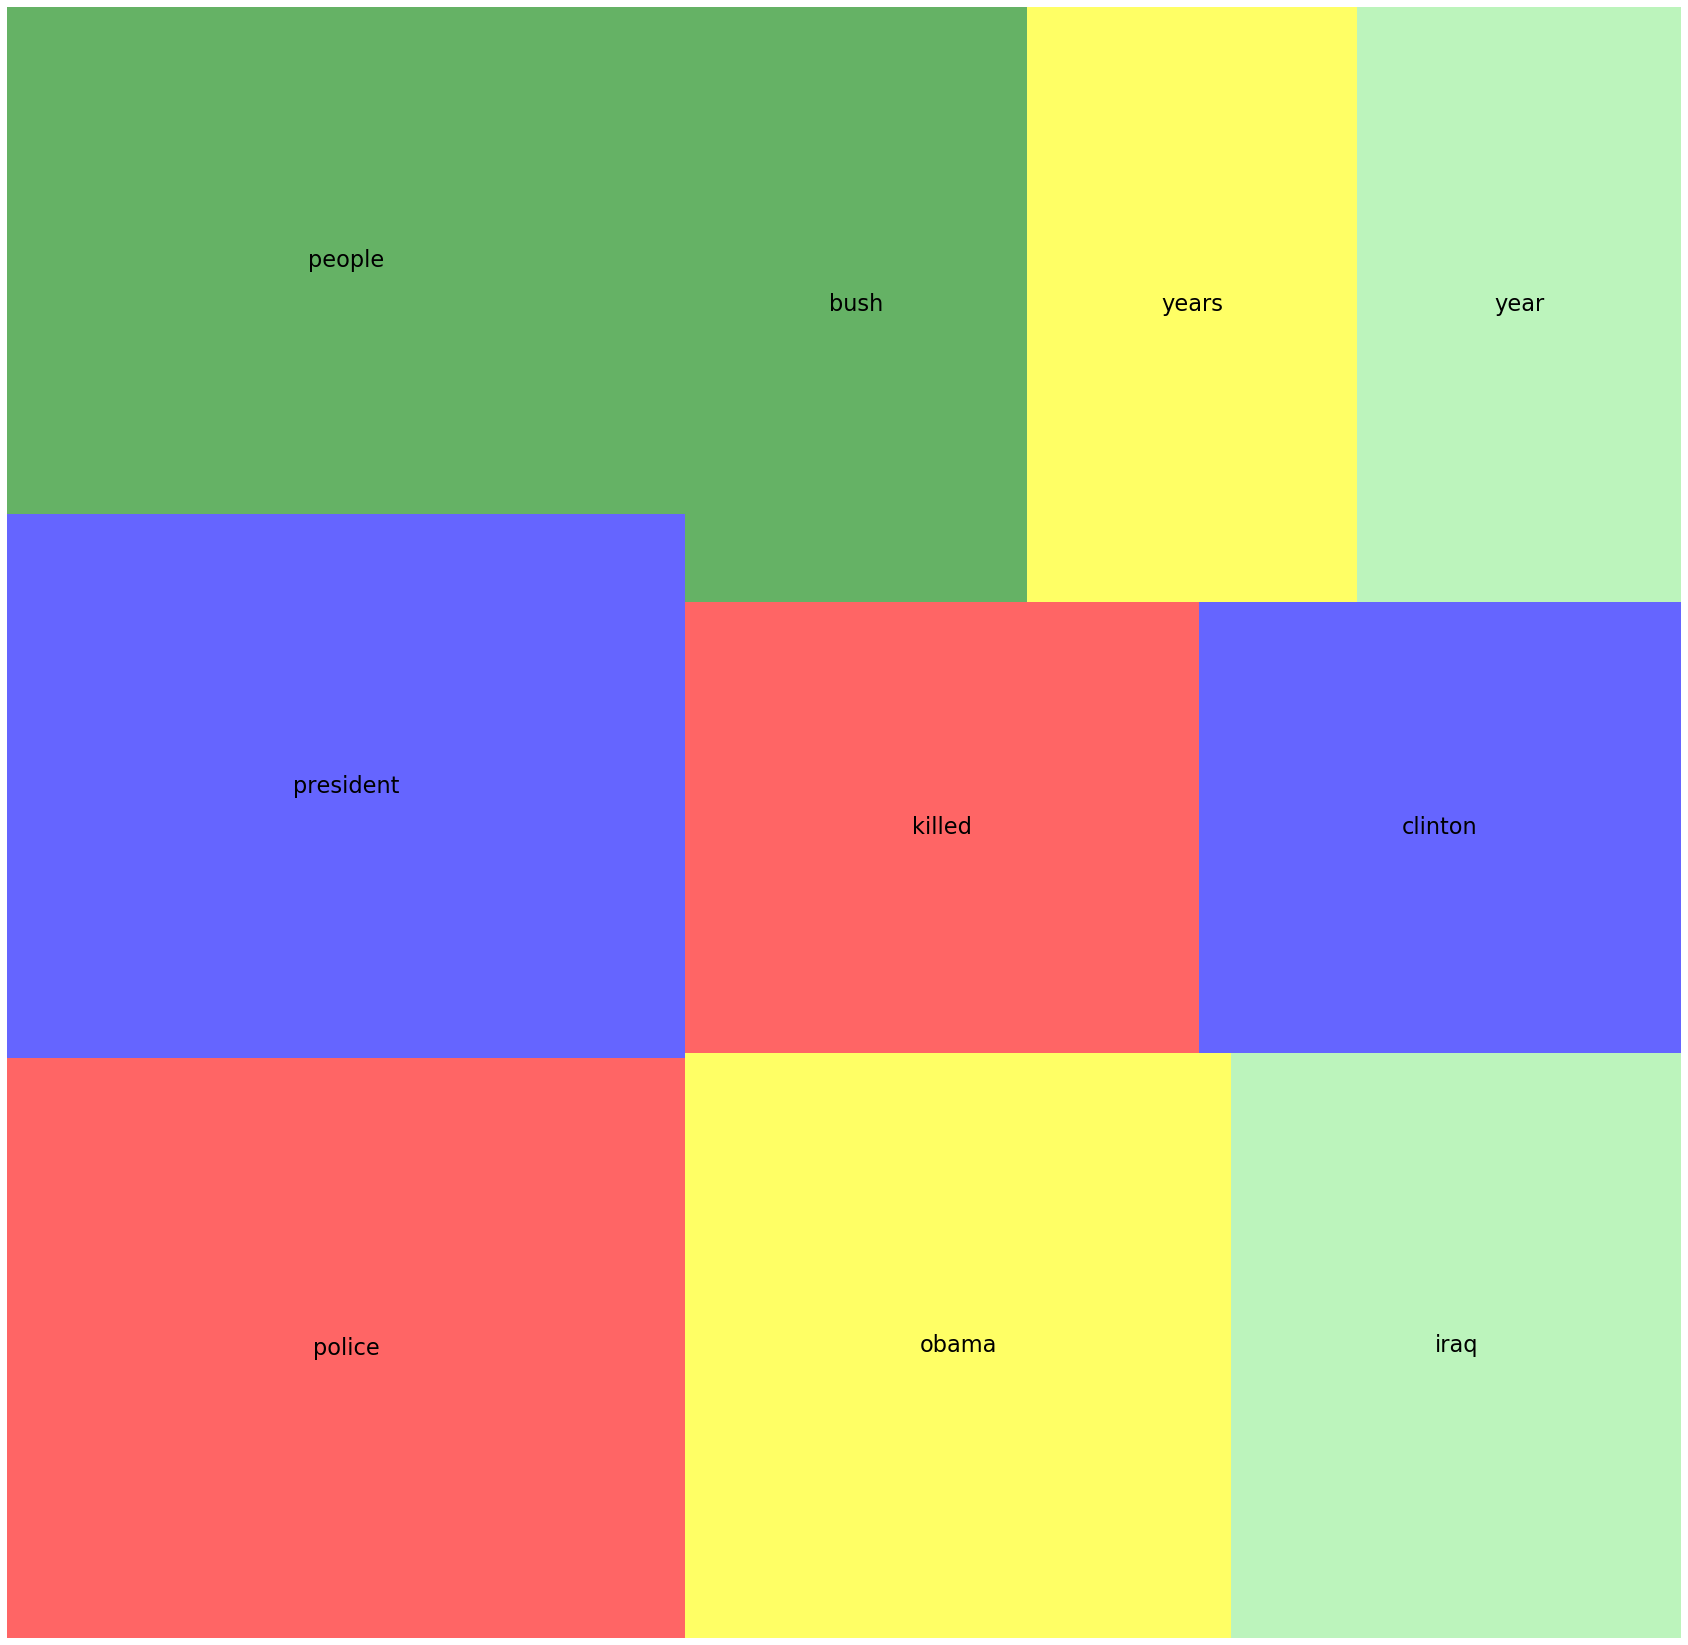

In [11]:
import squarify 

it_tm = freq

sizes = [item[1] for item in it_tm]
label=[item[0] for item in it_tm]
plt.figure(figsize=(30,30))
matplotlib.rcParams.update({'font.size': 22.5})
color=['red','blue','green','yellow','lightgreen']
squarify.plot(sizes=sizes, color=color,label=label, alpha=0.6)

plt.axis('off')
plt.show()
plt.close()

### 4.3 Word cloud

{'police': 112, 'president': 105, 'people': 98, 'obama': 91, 'iraq': 75, 'killed': 66, 'clinton': 62, 'bush': 58, 'years': 56, 'year': 55}


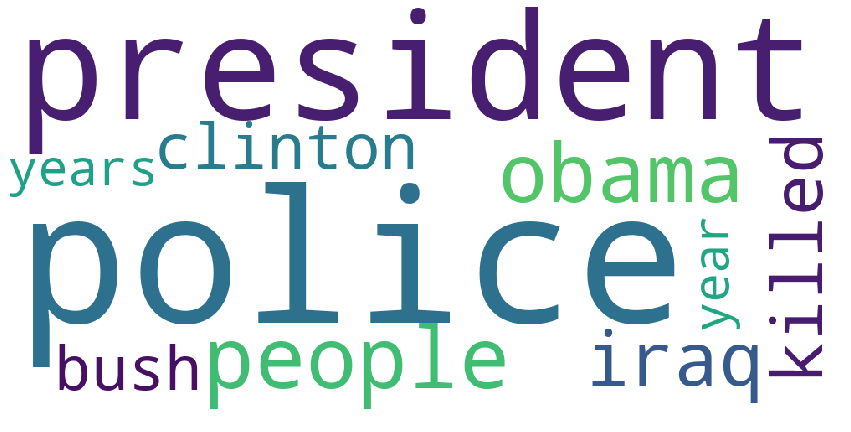

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def word_cloud(tupl):
    dic = {}
    for item in tupl:
        dic[item[0]]=item[1]
    print(dic)
    wordcloud = WordCloud(background_color="white", width = 1000, height = 500).generate_from_frequencies(dic)

    plt.figure(figsize=(15,8))
    plt.axis('off')
    plt.imshow(wordcloud)

word_cloud(freq)

## 5. TF-IDF

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

x = data_list(sample_data[0:10],stop_words)


In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

def TF_IDF(list_name):
    
    list_name = [" ".join(item) for item in list_name]
    #print(list_name)

    cv = CountVectorizer()

    # convert text data into term-frequency matrix
    data = cv.fit_transform(list_name)

    tfidf_transformer = TfidfTransformer()

    # convert term-frequency matrix into tf-idf
    tfidf_matrix = tfidf_transformer.fit_transform(data)

    # create dictionary to find a tfidf word each word
    word2tfidf = dict(zip(cv.get_feature_names(), tfidf_transformer.idf_))

    for word, score in word2tfidf.items():
        print(word, score)

TF_IDF(x)

actor 2.7047480922384253
address 2.7047480922384253
administration 2.7047480922384253
admits 2.7047480922384253
aid 2.7047480922384253
anytng 2.7047480922384253
atlanta 2.7047480922384253
attempt 2.7047480922384253
august 2.7047480922384253
avoidable 2.7047480922384253
awareness 2.7047480922384253
battle 2.7047480922384253
beam 2.7047480922384253
bore 2.7047480922384253
bridge 2.7047480922384253
burn 2.7047480922384253
bush 1.7884573603642702
camp 2.7047480922384253
cancer 2.7047480922384253
cash 2.7047480922384253
cef 2.2992829841302607
center 2.7047480922384253
change 2.7047480922384253
cldren 2.7047480922384253
cnn 2.2992829841302607
collapsed 2.7047480922384253
colonoscopy 2.7047480922384253
conduct 2.7047480922384253
cost 2.7047480922384253
court 2.7047480922384253
critical 2.7047480922384253
cut 2.7047480922384253
dad 2.7047480922384253
dana 2.7047480922384253
daniel 2.7047480922384253
david 2.7047480922384253
debate 2.7047480922384253
deeply 2.7047480922384253
die 2.704748092238

## 6. Sentimental Analysis
### 6.1 Unified

In [15]:
# textblob returns a unified scale of sentiment from -1 to 1
from textblob import TextBlob

def textblob_senti(sen):
    result = TextBlob(sen).sentiment
    #print(result)
    print (sen + "\n\n")
    print(f"The unified sentiment score: {result[0]}")

textblob_senti(sample_data[45])   

 orme , tennessee , has running water from 6 p.m. to 9 p.m.   town 's spring ran dry in midst of southeast drought .   donated water is trucked in from alabama .   completion of pipeline will solve problem for good . 


The unified sentiment score: 0.31666666666666665


### 6.2 Combined

In [16]:
# vader uses combined scoring
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def vader(sen):
    
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(sen)
    print (sen + "\n\n")
    print("The vader sentiment scores are: \n\n")
    
    print (str(vs))
    #return str(vs)
    
vader(sample_data[45])

 orme , tennessee , has running water from 6 p.m. to 9 p.m.   town 's spring ran dry in midst of southeast drought .   donated water is trucked in from alabama .   completion of pipeline will solve problem for good . 


The vader sentiment scores are: 


{'neg': 0.059, 'neu': 0.837, 'pos': 0.104, 'compound': 0.25}


### 6.3 Sentiment labels

In [17]:
# Flair returns a sentiment label after classification
from flair.models import TextClassifier
from flair.data import Sentence

classifier = TextClassifier.load('en-sentiment') #if needed

def flair(sen):
    sentence = Sentence(sen)
    classifier.predict(sentence)

    print('The Flair sentiment is: ')
    return sentence.labels[0]

flair(sample_data[45])

2021-06-29 18:06:30,933 loading file /Users/taolin/.flair/models/sentiment-en-mix-distillbert_4.pt
The Flair sentiment is: 


NEGATIVE (0.9975)